In [ ]:
!pip install pymongo
!pip install requests
!pip install polars
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install h2o

'!pip install pymongo\n!pip install requests\n!pip install polars\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install h2o'

In [2]:
import mondongo
import cleanfiles
import eda
import transforms
import dbSQL
import model

In [3]:
mondongo.upload_data()

Descargando CSV desde: https://media.githubusercontent.com/media/moonlightKiR/GTD/refs/heads/main/global_terrorism_data.csv...
CSV descargado correctamente.
Transformando CSV a JSON (Streaming)...
Archivo JSON creado correctamente.
Borrando coleccion existente...
Conectado a MongoDB.
Subiendo registros...
   - 5000 registros subidos...
   - 10000 registros subidos...
   - 15000 registros subidos...
   - 20000 registros subidos...
   - 25000 registros subidos...
   - 30000 registros subidos...
   - 35000 registros subidos...
   - 40000 registros subidos...
   - 45000 registros subidos...
   - 50000 registros subidos...
   - 55000 registros subidos...
   - 60000 registros subidos...
   - 65000 registros subidos...
   - 70000 registros subidos...
   - 75000 registros subidos...
   - 80000 registros subidos...
   - 85000 registros subidos...
   - 90000 registros subidos...
   - 95000 registros subidos...
   - 100000 registros subidos...
   - 105000 registros subidos...
   - 110000 registro

In [4]:
cleanfiles.clean_files()

In [5]:
df = eda.get_dataframe()

Conectando a MongoDB para extraer datos...
DataFrame creado con exito: 181691 filas y 136 columnas.


Analizando calidad del dato (Nulos y Vacios)...

Se han detectado 106 columnas con datos faltantes.
Top 100 variables con mas nulos/vacios:
 - gsubname3: 181671 faltantes (99.99%)
 - weapsubtype4: 181621 faltantes (99.96%)
 - weapsubtype4_txt: 181621 faltantes (99.96%)
 - weaptype4: 181618 faltantes (99.96%)
 - weaptype4_txt: 181618 faltantes (99.96%)
 - claimmode3: 181558 faltantes (99.93%)
 - claimmode3_txt: 181558 faltantes (99.93%)
 - gsubname2: 181531 faltantes (99.91%)
 - claim3: 181373 faltantes (99.82%)
 - guncertain3: 181371 faltantes (99.82%)
 - gname3: 181367 faltantes (99.82%)
 - divert: 181367 faltantes (99.82%)
 - attacktype3: 181263 faltantes (99.76%)
 - attacktype3_txt: 181263 faltantes (99.76%)
 - ransomnote: 181177 faltantes (99.72%)
 - ransompaidus: 181139 faltantes (99.70%)
 - ransomamtus: 181128 faltantes (99.69%)
 - claimmode2: 181075 faltantes (99.66%)
 - claimmode2_txt: 181075 faltantes (99.66%)
 - ransompaid: 180917 faltantes (99.57%)
 - corp3: 180665 faltantes

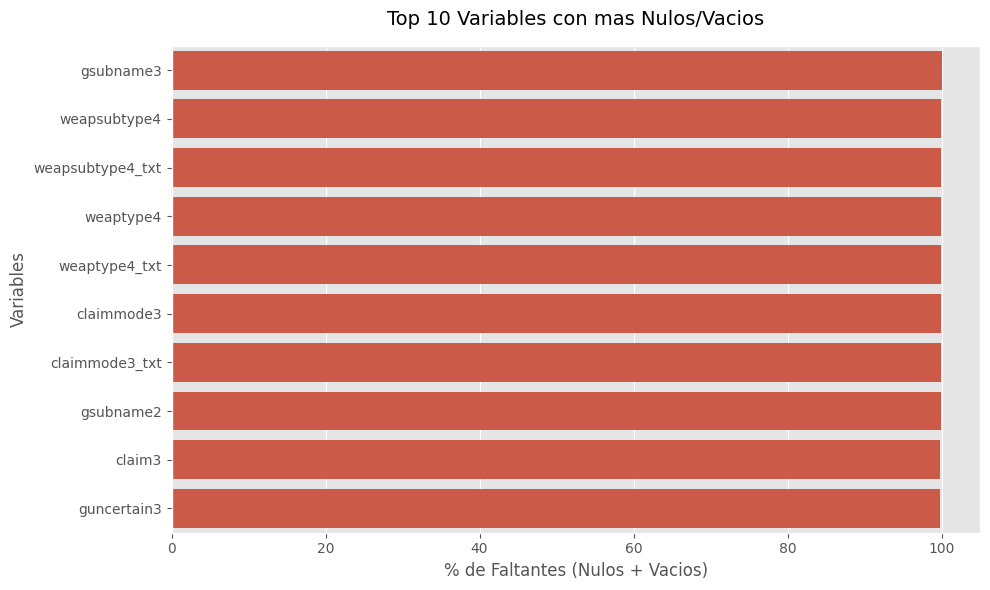

In [6]:
missing_col = eda.analyze_data_quality(df)

In [7]:
missing_col

['gsubname3',
 'weapsubtype4',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3',
 'natlty3_txt',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype3',
 'weaptype3_txt',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'target2',
 'targtype2',
 'targtype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode',
 'claimmode_txt',
 'rela

Todas esas columnas tienen un dato vacío o algún nulo

In [8]:
eda.check_duplicates(df)

Analizando duplicados...
Analisis de duplicados en 'eventid': 0 encontrados.


0

No hay ningún valor duplicado

In [9]:
df.describe()

statistic,_id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""",…,"""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""698cce4491cbc82cfe5a5696""","""197000000001""","""1970""","""0""","""0""","""""","""0""","""""","""10""","""Afghanistan""","""1""","""Australasia & Oceania""","""""","""""","""""","""""","""""","""-9""","""""","""""","""0""","""0""","""0""","""""","""""","""""","""""","""0""","""0""","""1""","""Armed Assault""","""""","""""","""""","""""","""1""",…,"""""","""""","""""","""""","""""","""""","""-9""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""Anti-Abortion Project 2010""","""-9""","""-9""","""-9""","""-9""",""""""
"""25%

Una parte importante de esto es que las fechas estén completas

Analizando las columnas y su contenido vemos que realmente solo tenemos unas 35 columnas útiles

In [10]:
df_clean = eda.run_lazy_pipeline(df)

Iniciando Pipeline Lazy (Optimización de Polars)...
Ejecutando plan optimizado con .collect()...
Procesamiento Lazy finalizado: 180800 registros válidos conservados.


In [11]:
display(df_clean.null_count())

eventid,nkill,nwound,success,propvalue,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,gname,gsubname,attacktype1_txt,suicide,targtype1_txt,corp1,target1,weaptype1_txt,weapsubtype1_txt
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Procedemos a un poco de visualización de los valores de un modo mas gráfico

Graficando Top 15 países con estado de éxito...


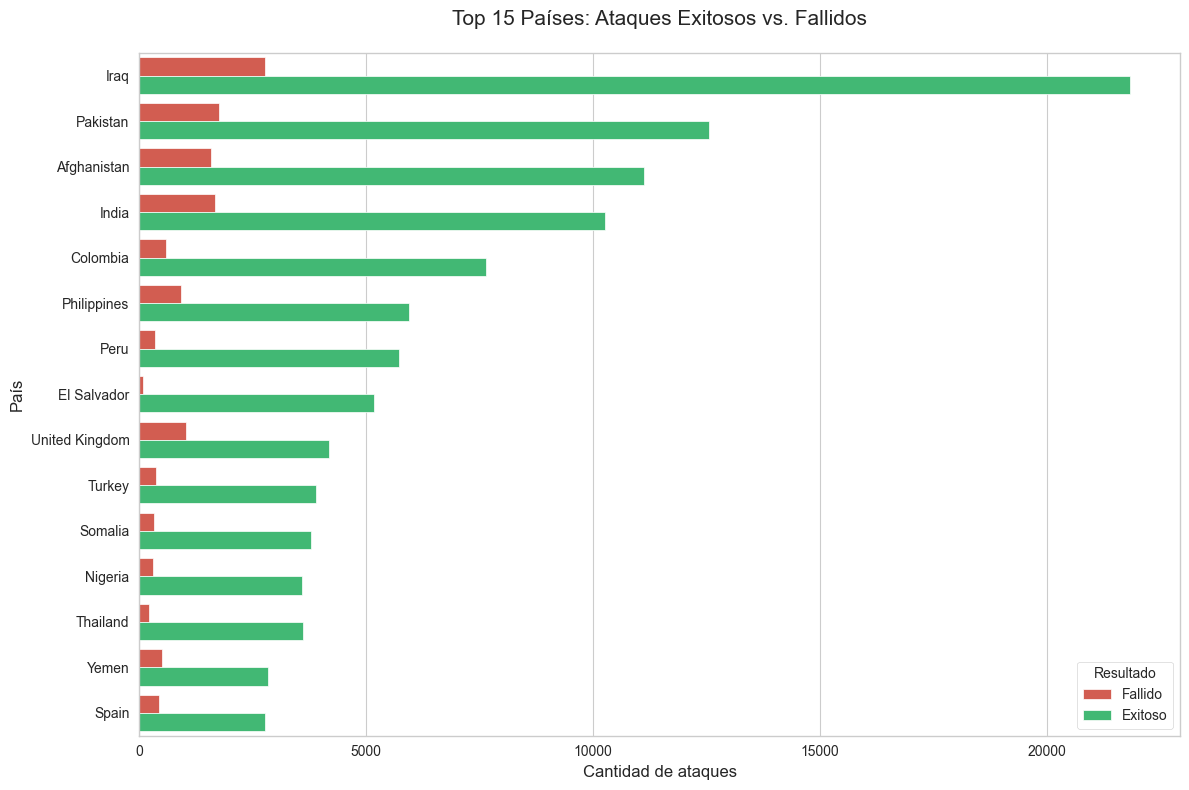

In [12]:
eda.plot_top_countries(df_clean, top_n=15)

Graficando distribución por tipo de arma...


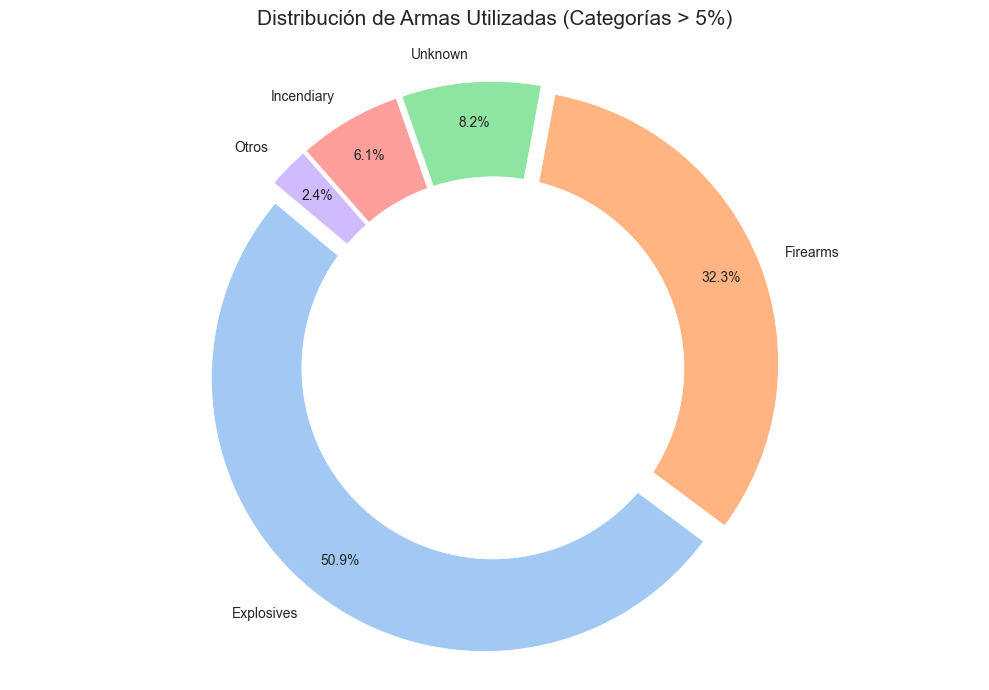

In [13]:
eda.plot_attacks_by_weapon(df_clean)

Graficando Top 10 grupos con estado de éxito...


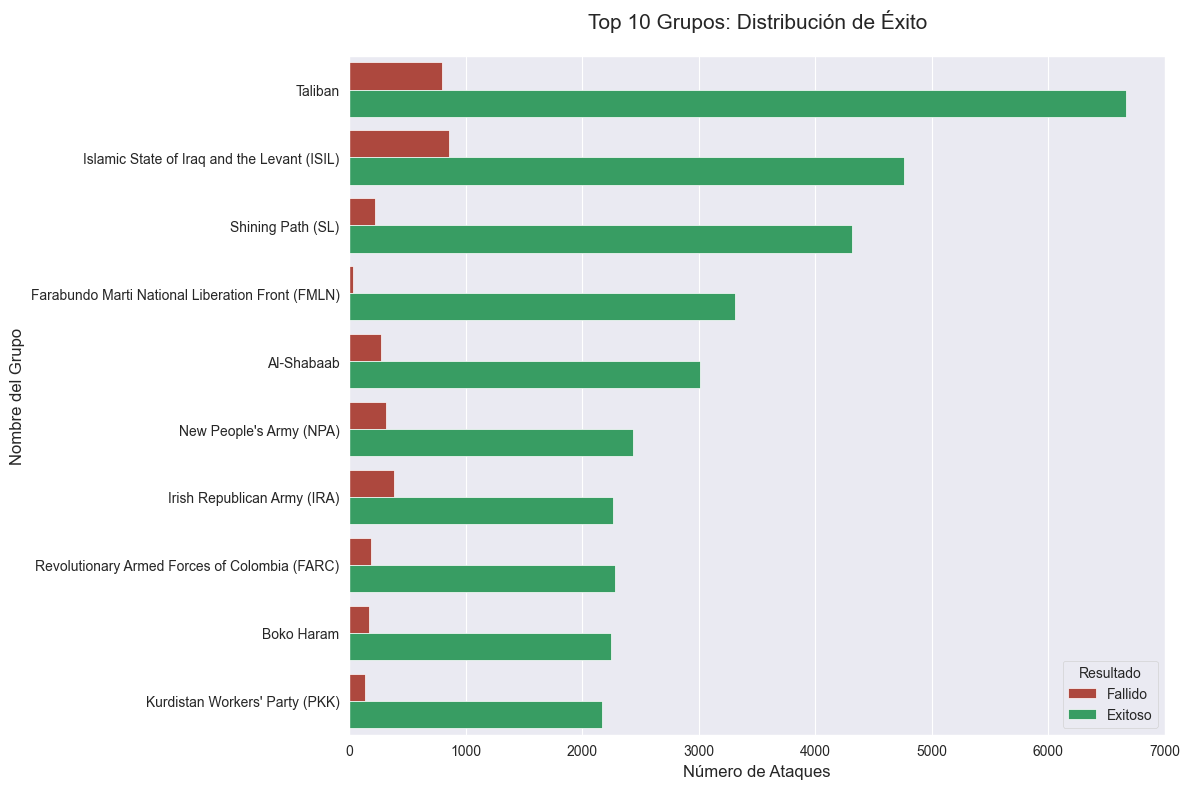

In [14]:
eda.plot_top_groups(df_clean, top_n=10)

Graficando evolución histórica por éxito...


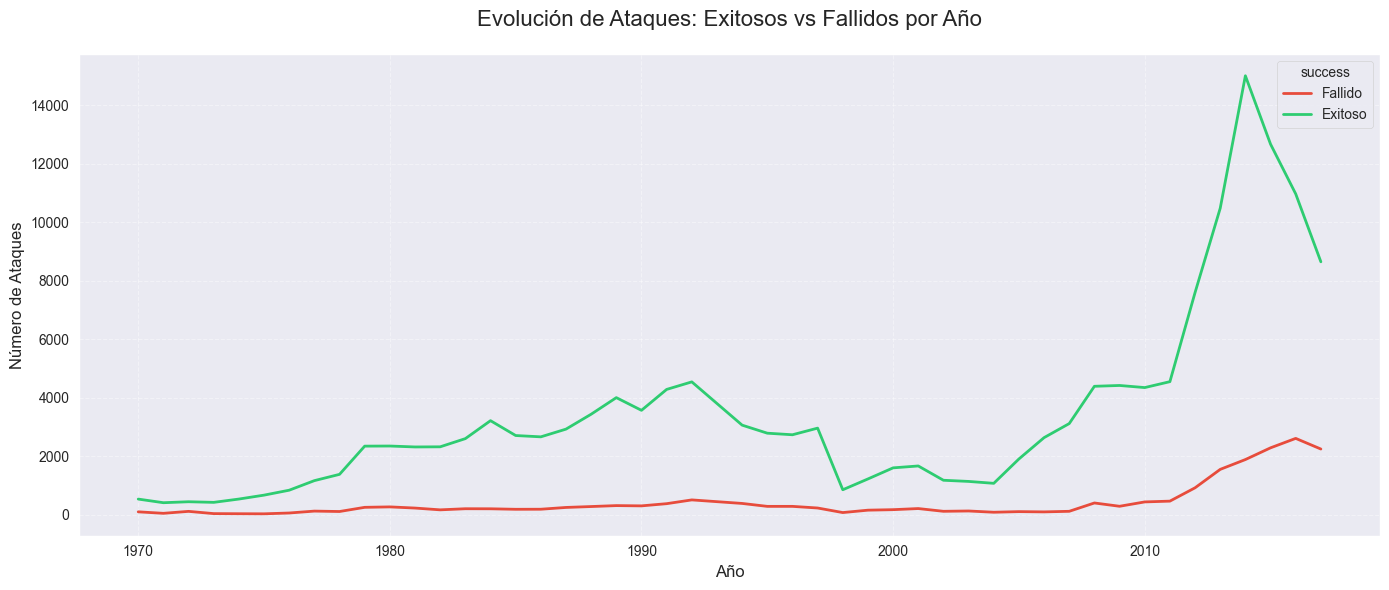

In [15]:
eda.plot_historical_evolution(df_clean)

Aquí procederemos a modificar el tipo de variable de unas columnas específicas, para que en lugar de estar en string, sean números

In [16]:
df_clean.schema

Schema([('eventid', String),
        ('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Float64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Y ahora procederemos con el mapeo de las columnas categóricas.

In [17]:
eda.list_categorical_uniques(df_clean)

Buscando valores únicos en columnas de texto...

Columna String: 'eventid'
  Total únicos: 180800
  Valores (Top 15): ['201703240001', '201207230012', '201706080016', '198802120009', '198611090003', '201307080058', '201612300006', '198910230012', '198111200001', '198302230003', '199010100009', '201010040012', '201409070049', '201601100037', '197911070003']...

Columna String: 'country_txt'
  Total únicos: 205
  Valores (Top 15): ['Seychelles', 'Zaire', 'Cyprus', 'Germany', 'Libya', 'Ukraine', 'Madagascar', 'Thailand', 'Portugal', 'Sierra Leone', 'Zimbabwe', 'South Sudan', 'Malaysia', 'Saudi Arabia', 'Macau']...

Columna String: 'region_txt'
  Total únicos: 12
  Valores: ['Australasia & Oceania', 'South Asia', 'Central America & Caribbean', 'East Asia', 'Southeast Asia', 'South America', 'Middle East & North Africa', 'Central Asia', 'Sub-Saharan Africa', 'Eastern Europe', 'Western Europe', 'North America']

Columna String: 'provstate'
  Total únicos: 2841
  Valores (Top 15): ['Polog (Re

{'eventid': ['201703240001',
  '201207230012',
  '201706080016',
  '198802120009',
  '198611090003',
  '201307080058',
  '201612300006',
  '198910230012',
  '198111200001',
  '198302230003',
  '199010100009',
  '201010040012',
  '201409070049',
  '201601100037',
  '197911070003',
  '200009290003',
  '201406030062',
  '201504030068',
  '201603200023',
  '199707300011',
  '199004030013',
  '199204130004',
  '201009080012',
  '201506160033',
  '199104190008',
  '197009020002',
  '199006220016',
  '199610100046',
  '201310140013',
  '201405310026',
  '199210070018',
  '198706090007',
  '201410190005',
  '201312290065',
  '201510090081',
  '201610280029',
  '198112010004',
  '201705150017',
  '201708160003',
  '200007180006',
  '201305300024',
  '200501180004',
  '200510310002',
  '201008040004',
  '200908280003',
  '201209090056',
  '198310190001',
  '201007080008',
  '201404290056',
  '201312090009',
  '201712120038',
  '199207040001',
  '201005120008',
  '201408110055',
  '201209100003',

Antes de enviar los datos a hacer los modelos, procederemos a guardarlos en una base de datos sql de SQLite

Como hemos eliminado el eventid deberemos volver a añadirlo.

In [18]:
if "eventid" not in df_clean.columns:
    df_clean = df_clean.with_columns(df.select("eventid"))

Una vez añadido, podemos subir el dataframe para almacenarlo a modo data wharehouse

In [19]:
dbSQL.ejecutar_pipeline_sql(df_clean)


Iniciando SQL Pipeline en: data/terrorismo_gtd.db
Directorio creado: data
Base de datos limpia.
Unificando año-mes-día en columna 'fecha'...
Procesando dimensión: id_tiempo...
Procesando dimensión: id_ubicacion...
Procesando dimensión: id_grupo...
Procesando dimensión: id_metodo...
Procesando dimensión: id_objetivo...
Procesando Armas y Puente...
Hechos insertados: 180800


Recién añadidos los datos, usaremos una función para extraerlos ya como dataframe de la base de datos.

In [20]:
df_sql = dbSQL.extraer_dataframe_analitico()

Extrayendo datos de: data/terrorismo_gtd.db...
Extracción completada: 180800 filas.


Seguidamente de haber realizado este eda, haremos una reducción de variables aprovechando la parte de h2o, además de quitarle las variables subgrupo como city, latitude longitude, etc.


In [21]:
columns_retire = ["region_txt", "provstate", "city", "latitude", "longitude", "gsubname", "corp1", "target1", "weapsubtype1_txt"]

df_sql = df_sql.drop(columns_retire)

Con esas columnas que sabemos que son tipo string, vamos a codificarlas a numérico conservando el mapeo.

In [22]:
df_num, mis_mapeos = eda.encode_categorical_columns(df_sql)

Codificando columnas detectadas como texto: ['fecha', 'country_txt', 'gname', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt']...
 - 'fecha' codificado (16070 categorías).
 - 'country_txt' codificado (205 categorías).
 - 'gname' codificado (3517 categorías).
 - 'attacktype1_txt' codificado (9 categorías).
 - 'targtype1_txt' codificado (22 categorías).
 - 'weaptype1_txt' codificado (12 categorías).


In [23]:
eda.show_specific_mapping(mis_mapeos, "targtype1_txt")


--- Mapeo para la columna: targtype1_txt ---
 ID  0 -> Utilities
 ID  1 -> Unknown
 ID  2 -> Abortion Related
 ID  3 -> Terrorists/Non-State Militia
 ID  4 -> Airports & Aircraft
 ID  5 -> Educational Institution
 ID  6 -> Government (General)
 ID  7 -> Maritime
 ID  8 -> Religious Figures/Institutions
 ID  9 -> Tourists
 ID 10 -> Police
 ID 11 -> Journalists & Media
 ID 12 -> Telecommunication
 ID 13 -> Private Citizens & Property
 ID 14 -> Transportation
 ID 15 -> Violent Political Party
 ID 16 -> Military
 ID 17 -> Business
 ID 18 -> Other
 ID 19 -> Food or Water Supply
 ID 20 -> Government (Diplomatic)
 ID 21 -> NGO
------------------------------------------



Una vez llegamos a este punto, debemos mirar que correlaciones hay entre las variables.
Para ello usaremos una matriz de correlación

Iniciando análisis de correlación (Umbral > 0.4)...

--- Variables con Correlación >= 0.4 ---
 * nkill <-> nwound: 0.4435

Lista de variables altamente correlacionadas: ['nwound', 'nkill']


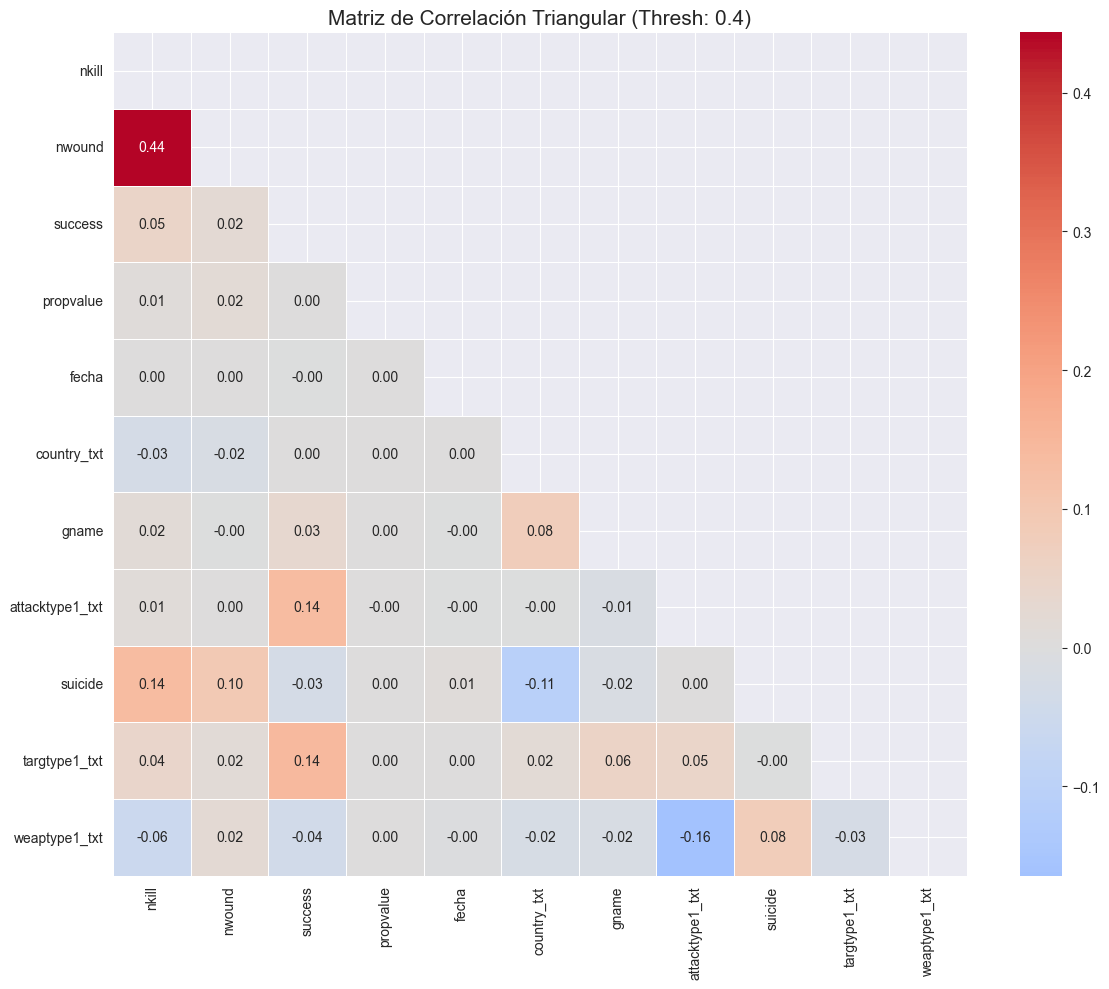

In [24]:
corr_matrix = eda.show_correlation_analysis(df_num, threshold=0.4)

En esta matriz vemos que hay alta correlación entre nwound y nkill y entre el weapontype1 y weapsubtype1, viendo así que no hay una correlación aparente con los ataques, solo en el numero de bajas y heridos, y tipo de arma usada.

Para poder trabajar con h2o, este solo acepta dataframes de pandas, por lo tanto creamos una funcion para convertir el dataframe de polars a pandas.

In [25]:
df_pandas = transforms.convert_to_pandas(df_num)

Iniciando conversión de Polars a Pandas...
Conversión exitosa. DataFrame de Pandas listo con 180800 registros.


In [26]:
df_pandas

,eventid,nkill,nwound,success,propvalue,fecha,country_txt,gname,attacktype1_txt,suicide,targtype1_txt,weaptype1_txt
0,197000000001,1,0,1,0.0,3572,79,112,3,0,13,3
1,197001010002,0,0,1,0.0,4631,107,3060,6,0,10,1
2,197001020001,0,0,0,0.0,10008,80,989,3,0,10,1
3,197001020002,0,0,1,22500.0,10008,107,368,5,0,0,4
4,197001020003,0,0,1,60000.0,10008,107,439,4,0,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...
180795,201712310022,1,2,1,0.0,15637,22,3128,6,0,16,1
180796,201712310029,2,7,1,-99.0,15637,103,1579,5,0,16,4
180797,201712310030,0,0,1,-99.0,15637,171,2003,4,0,13,8
180798,201712310031,0,0,0,0.0,15637,185,368,5,0,6,4


Aquí obteniendo nuestro dataframe en pandas, ya que si lo hacemos con polars, este no funciona porque h2o no acepta dataframes en polars.

In [27]:
hf = model.init(df_pandas)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "23.0.2" 2025-01-21; Java(TM) SE Runtime Environment (build 23.0.2+7-58); Java HotSpot(TM) 64-Bit Server VM (build 23.0.2+7-58, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpotylvtzt
  JVM stdout: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpotylvtzt/h2o_guille_started_from_python.out
  JVM stderr: /var/folders/w2/d79hqs192f71qyyzr9n9rkrm0000gn/T/tmpotylvtzt/h2o_guille_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,2 months and 18 days
H2O_cluster_name:,H2O_from_python_guille_jatl6u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.484 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
#  hf_reducido, pca_info = model.reduce_variables_h2o(hf, k=6)

In [29]:
predictors, classification_target, regression_target, hf = model.split_data(hf)

In [30]:
train,test = model.divide_data(hf)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Accuracy (default threshold): 0.9320
Accuracy (threshold max F1): 0.9320
AUC: 0.9181
F1: [[0.6965137096685892, 0.9625310969002305]]
Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6965137096685892
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      2118  1891   0.4717   (1891.0/4009.0)
1      564   31533  0.0176   (564.0/32097.0)
Total  2682  33424  0.068    (2455.0/36106.0)

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


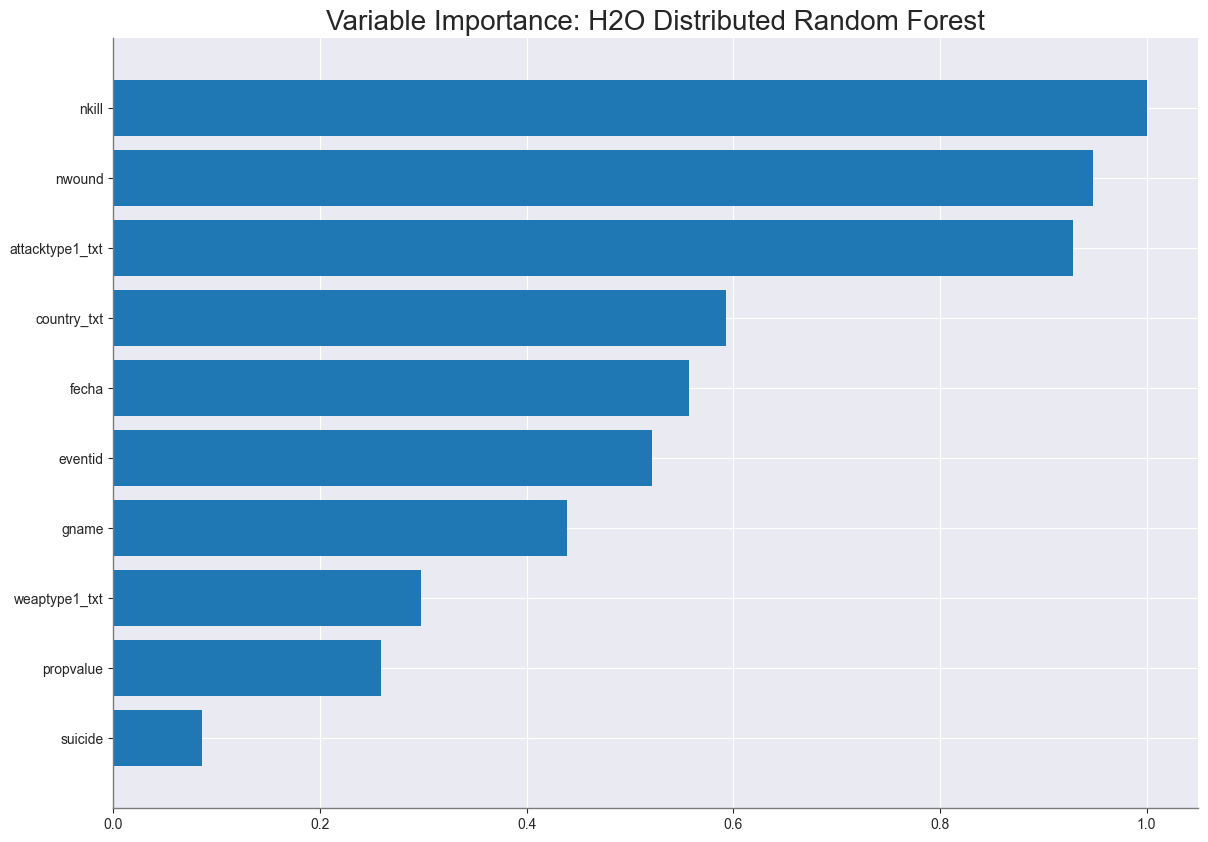

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

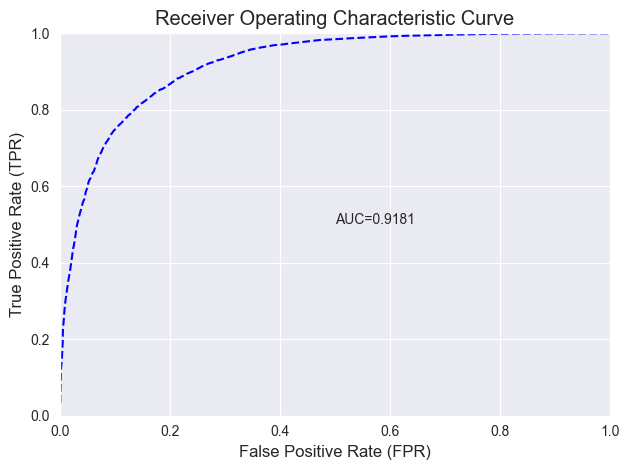

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770835555362_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          3.78244e+06            20           20           20            5031          6842          6005.08

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.15468140459341131
RMSE: 0.3932955689979374
LogLoss: 0.4324477918721788
Mean Per-Class Error: 0.0716575070244172
AUC: 0.9806012022178934
AUCPR: 0.9836951473206884
Gini: 0.9612024044357868

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8447080999264203
       0       1       Error    Rate
-----  ------  ------  -------  ------------------
0      120529  8183    0.0636   (8183.0/128712.0)
1      10264   118456  0.0797   (10264.0/128720.0)
Total  130793  126639  0.0717   (18447.0/257432.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.844708     0.927761  85
max f2                       0.769048     0.94035   120
max f0point5                 0.914221     0.952523  53
max accuracy                 0.863366     0.928707  76
max precision                0.999931     1         0
max recall                   9.1117e-05   1         399
max specificity              0.999931     1         0
max absolute_mcc             0.867726     0.858671  74
max min_per_class_accuracy   0.837377     0.926422  89
max mean_per_class_accuracy  0.863366     0.928708  76
max tns                      0.999931     128712    0
max fns                      0.999931     114276    0
max fps                      9.1117e-05   128712    399
max tps                      9.1117e-05   128720    399
max tnr                      0.999931     1         0
max fnr                      0.999931     0.887787  0
max fpr                      9.1117e-05   1         399
max tpr                      9.1117e-05   1         399

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 71.61 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0409545                   1                  1.99994     1.99994            1                1          1                           1                   0.0819065       0.0819065                  99.9938   99.9938            0.0819065
2        0.0500016                   0.999744           1.99994     1.99994            1                0.999866   1                           0.999976            0.0180935       0.1                        99.9938   99.9938            0.1
3        0.100003                    0.998457           1.99994     1.99994            1                0.999144   1                           0.99956             0.1             0.2                        99.9938   99.9938            0.2
4        0.150001                    0.996498           1.99994     1.99994            1                0.997531   1                           0.998884            0.0999922       0.299992                   99.9938   99.9938            0.299992
5        0.200002                    0.993703           1.99994     1.99994            1                0.995156   1    

In [31]:
model.classify_h2o(train, test, predictors, classification_target)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R^2: 0.2079
RMSE: 4.3929
MAE: 3.5034

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


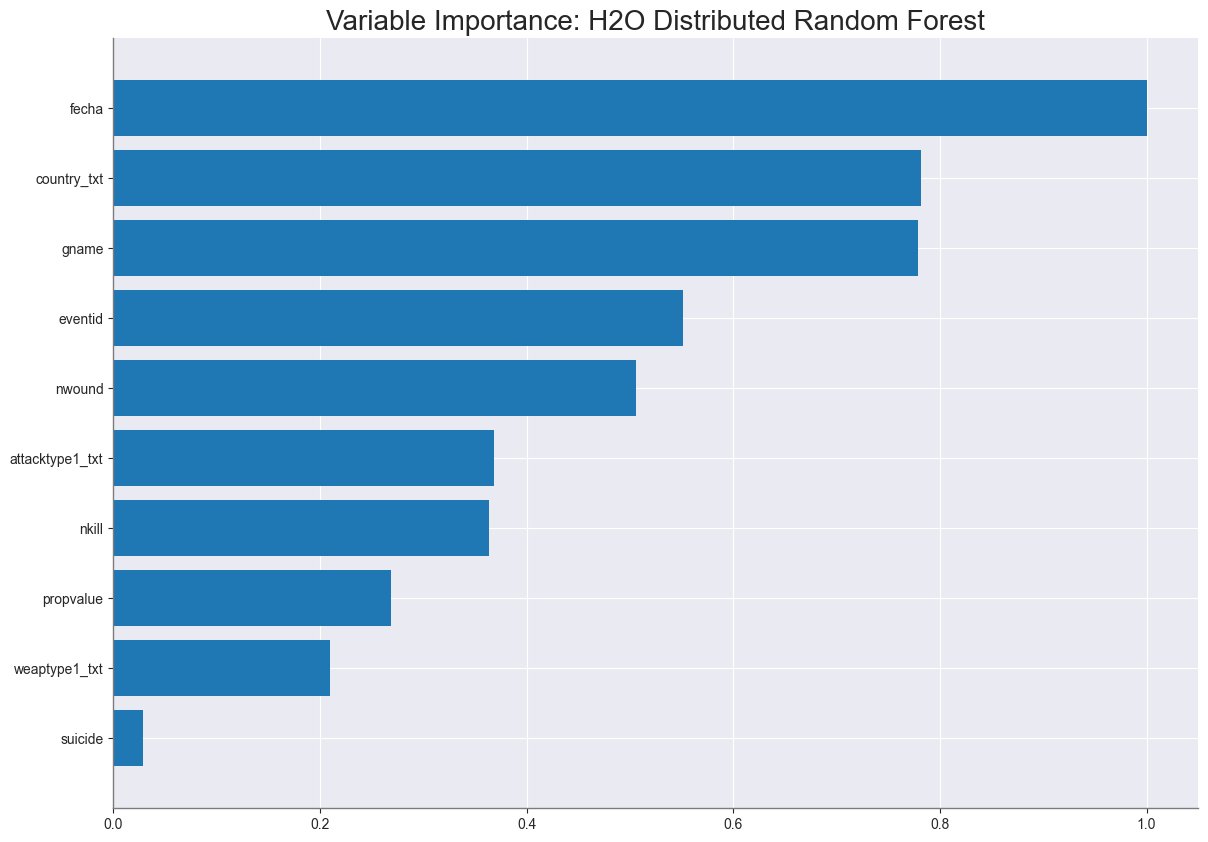

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1770835555362_44


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          9.69355e+06            20           20           20            10713         19496         15415.6

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 19.423711383023623
RMSE: 4.407233983239785
MAE: 3.5116916778721414
RMSLE: 0.5864279366179281
Mean Residual Deviance: 19.423711383023623

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2026-02-11 19:46:04  0.016 sec   0.0                nan                 nan                 nan
     2026-02-11 19:46:04  0.151 sec   1.0                5.015178254391055   3.806241094600418   25.152012923316907
     2026-02-11 19:46:04  0.243 sec   2.0                4.95953741874815    3.790280501271758   24.597011407963063
     2026-02-11 19:46:04  0.305 sec   3.0                4.857605069833407   3.7361582891019642  23.596327014471218
     2026-02-11 19:46:04  0.371 sec   4.0                4.7933016785237506  3.7063738702865847  22.975740981338607
     2026-02-11 19:46:04  0.418 sec   5.0                4.749862754257568   3.6983627417433724  22.561196184283286
     2026-02-11 19:46:04  0.476 sec   6.0                4.724769673931585   3.6884862478695735  22.32344847170358
     2026-02-11 19:46:04  0.529 sec   7.0                4.687720128650428   3.667531985258836   21.974720004554385
     2026-02-11 19:46:05  0.585 sec   8.0                4.651013295726306   3.6455037314681937  21.631924677022877
     2026-02-11 19:46:05  0.652 sec   9.0                4.618260369129453   3.6273741925698513  21.328328837071705
---  ---                  ---         ---                ---                 ---                 ---
     2026-02-11 19:46:06  2.367 sec   41.0               4.413625296217489   3.5141345661620993  19.480088255410923
     2026-02-11 19:46:06  2.415 sec   42.0               4.413167230696435   3.513988848453091   19.47604500609284
     2026-02-11 19:46:06  2.455 sec   43.0               4.413035663423491   3.514883055952157   19.474883766647615
     2026-02-11 19:46:06  2.505 sec   44.0               4.411786501621543   3.513994098904042   19.463860135890048
     2026-02-11 19:46:07  2.557 sec   45.0               4.410862736040537   3.513434955296192   19.45571007619101
     2026-02-11 19:46:07  2.602 sec   46.0               4.410012256008527   3.513855136313925   19.44820809814542
     2026-02-11 19:46:07  2.661 sec   47.0               4.408322063671619   3.512702727836604   19.433303417054006
     2026-02-11 19:46:07  2.714 sec   48.0               4.407726619826889   3.5120071943213307  19.428053955130572
     2026-02-11 19:46:07  2.765 sec   49.0               4.407347353746761   3.511608081035938   19.424710696578583
     2026-02-11 19:46:07  2.814 sec   50.0               4.407233983239785   3.5116916778721414  19.423711383023623
[51 rows x 7 columns]


Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
fecha            9.24692e+06            1                    0.205919
country_txt      7.22716e+06            0.781575             0.160941
gname            7.20447e+06            0.779121             0.160436
eventid          5.09678e+06            0.551187             0.1135
nwound           4.67373e+06            0.505436             0.104079
a

<Figure size 640x480 with 0 Axes>

In [32]:
model.regression_h2o(train, test, predictors, regression_target)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
R²: 0.4655426802118564
MSE: 0.05275392435841196
RMSE: 0.22968222473324304

--- Generando Visualizaciones de H2O ---
Graficando Importancia de Variables...


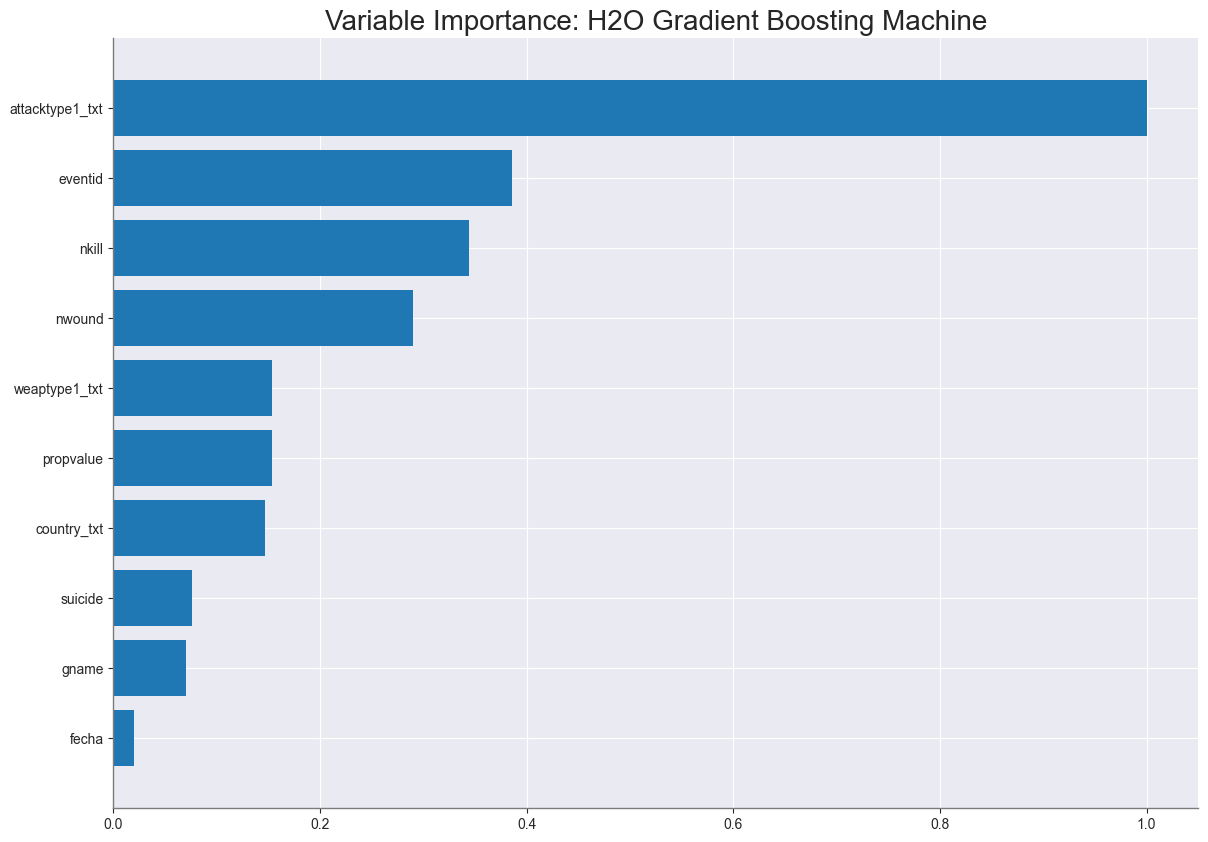

Graficando Curva ROC...


<Figure size 640x480 with 0 Axes>

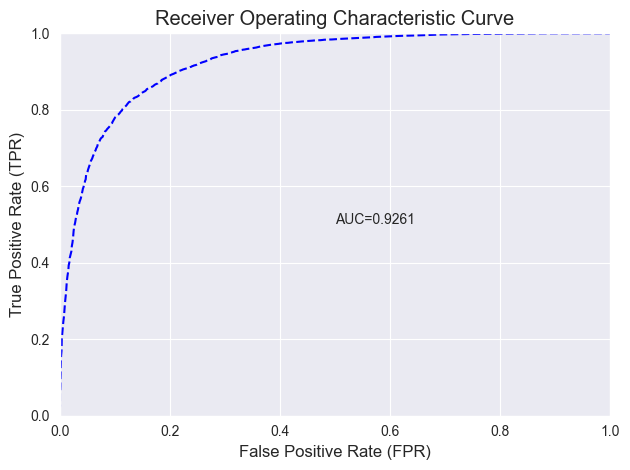

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1770835555362_45


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    190                190                         79728                  0            5            4.97368       1             32            28.6474

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05055411111399546
RMSE: 0.22484241395696555
LogLoss: 0.1777524708964352
Mean Per-Class Error: 0.23422197568874156
AUC: 0.9352848219095621
AUCPR: 0.9901200107676029
Gini: 0.8705696438191242

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5289129862156436
       0      1       Error    Rate
-----  -----  ------  -------  -----------------
0      8777   7197    0.4505   (7197.0/15974.0)
1      2304   126416  0.0179   (2304.0/128720.0)
Total  11081  133613  0.0657   (9501.0/144694.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.528913     0.963783  252
max f2                       0.30163      0.980946  320
max f0point5                 0.786833     0.961391  165
max accuracy                 0.570972     0.934538  238
max precision                0.998549     0.999672  2
max recall                   0.0389409    1         392
max specificity              0.999323     0.999937  0
max absolute_mcc             0.672679     0.643502  209
max min_per_class_accuracy   0.877573     0.859084  118
max mean_per_class_accuracy  0.872345     0.859782  121
max tns                      0.999323     15973     0
max fns                      0.999323     126590    0
max fps                      0.0158015    15974     399
max tps                      0.0389409    128720    392
max tnr                      0.999323     0.999937  0
max fnr                      0.999323     0.983452  0
max fpr                      0.0158015    1         399
max tpr                      0.0389409    1         392

Gains/Lift Table: Avg response rate: 88.96 %, avg score: 88.96 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100004                   0.999269           1.1241    1.1241             1                0.999469  1                           0.999469            0.0112415       0.0112415                  12.4099   12.4099            0.0112415
2        0.0200077                   0.999008           1.12332   1.12371            0.999309         0.999148  0.999655                    0.999308            0.0112415       0.0224829                  12.3323   12.3711            0.0224203
3        0.0300012                   0.998646           1.12332   1.12358            0.999308         0.99882   0.999539                    0.999146            0.0112259       0.0337088                  12.3321   12.3581            0.0335836
4        0.0400017                   0.998265           1.1241    1.12371            1                0.998472  0.999654                    0.998977            0.0112415       0.0449503                  12.4099   12.371             0.0448251
5        0.0500021                   0.997705           1.12255   1.12348            0.998618         0.998001  0.999447 

In [33]:
model.gradientBoost_h2o(train, test, predictors, classification_target)
